# Crime Data

# Unemployment Data

Insert Data from the Excel File

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Per Borough

In [4]:
unemployed = pd.read_excel('./Data/Unemployment_NYC.xlsx',sheet_name=0)

In [27]:
# converting headers to lowercase and removing whitespaces:
unemployed.columns = unemployed.columns.str.lower()
unemployed.columns = unemployed.columns.str.strip()

In [28]:
unemployed.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
0,County,Albany County,2024,1,158900,153000,6000,3.8
1,County,Albany County,2024,2,159300,153200,6100,3.8
2,County,Albany County,2024,3,158700,152900,5800,3.6
3,County,Albany County,2023,0,160600,155300,5300,3.3
4,County,Albany County,2023,1,157700,152200,5400,3.5


In [29]:
unemployed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27590 entries, 0 to 27589
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    27590 non-null  object 
 1   area        27590 non-null  object 
 2   year        27590 non-null  int64  
 3   month       27590 non-null  int64  
 4   laborforce  27590 non-null  int64  
 5   emp         27590 non-null  int64  
 6   unemp       27590 non-null  int64  
 7   unemprate   27590 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.7+ MB


### Filter the data
for the 5 boroughs: Bronx, Kings, New York, Queens, Richmond are the official names for the boroughs

In [30]:
unemployed['areatype'].unique()

array(['County'], dtype=object)

In [31]:
unemployed['area'].unique()

array(['Albany County', 'Allegany County', 'Bronx County',
       'Broome County', 'Cattaraugus County', 'Cayuga County',
       'Chautauqua County', 'Chemung County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Dutchess County', 'Erie County',
       'Essex County', 'Franklin County', 'Fulton County',
       'Genesee County', 'Greene County', 'Hamilton County',
       'Herkimer County', 'Jefferson County', 'Kings County',
       'Lewis County', 'Livingston County', 'Madison County',
       'Monroe County', 'Montgomery County', 'Nassau County',
       'New York County', 'Niagara County', 'Oneida County',
       'Onondaga County', 'Ontario County', 'Orange County',
       'Orleans County', 'Oswego County', 'Otsego County',
       'Putnam County', 'Queens County', 'Rensselaer County',
       'Richmond County', 'Rockland County', 'Saratoga County',
       'Schenectady County', 'Schoharie County', 'Schuyler County',
       'S

In [32]:
borough = ['Bronx County', 'Kings County', 'New York County', 'Queens County', 'Richmond County']
borough_unem = unemployed.loc[unemployed['area'].isin(borough)]
borough_unem.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
890,County,Bronx County,2024,1,603800,567500,36300,6.0
891,County,Bronx County,2024,2,611800,573800,38000,6.2
892,County,Bronx County,2024,3,613000,577900,35100,5.7
893,County,Bronx County,2023,0,607900,566400,41500,6.8
894,County,Bronx County,2023,1,607200,561500,45700,7.5


In [33]:
borough_unem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225 entries, 890 to 19134
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    2225 non-null   object 
 1   area        2225 non-null   object 
 2   year        2225 non-null   int64  
 3   month       2225 non-null   int64  
 4   laborforce  2225 non-null   int64  
 5   emp         2225 non-null   int64  
 6   unemp       2225 non-null   int64  
 7   unemprate   2225 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 156.4+ KB


In [34]:
borough_unem['avg_year']= borough_unem['month']==0
borough_unem.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/3479947575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_unem['avg_year']= borough_unem['month']==0


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
890,County,Bronx County,2024,1,603800,567500,36300,6.0,False
891,County,Bronx County,2024,2,611800,573800,38000,6.2,False
892,County,Bronx County,2024,3,613000,577900,35100,5.7,False
893,County,Bronx County,2023,0,607900,566400,41500,6.8,True
894,County,Bronx County,2023,1,607200,561500,45700,7.5,False


In [35]:
borough_unem['avg_year'].unique()

array([False,  True])

### Creating df with only avg yearly and with only monthly data.

In [45]:
bo_unem_yearly = borough_unem.loc[borough_unem['avg_year'] == True]
bo_unem_yearly.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
893,County,Bronx County,2023,0,607900,566400,41500,6.8,True
906,County,Bronx County,2022,0,603400,555800,47600,7.9,True
919,County,Bronx County,2021,0,614100,529000,85200,13.9,True
932,County,Bronx County,2020,0,613100,514900,98200,16.0,True
945,County,Bronx County,2019,0,624300,590700,33600,5.4,True


In [46]:
bo_unem_yearly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 893 to 19122
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    170 non-null    object 
 1   area        170 non-null    object 
 2   year        170 non-null    int64  
 3   month       170 non-null    int64  
 4   laborforce  170 non-null    int64  
 5   emp         170 non-null    int64  
 6   unemp       170 non-null    int64  
 7   unemprate   170 non-null    float64
 8   avg_year    170 non-null    bool   
dtypes: bool(1), float64(1), int64(5), object(2)
memory usage: 12.1+ KB


In [69]:
bo_unem_monthly = borough_unem.loc[borough_unem['avg_year'] == False]
bo_unem_monthly.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
890,County,Bronx County,2024,1,603800,567500,36300,6.0,False
891,County,Bronx County,2024,2,611800,573800,38000,6.2,False
892,County,Bronx County,2024,3,613000,577900,35100,5.7,False
894,County,Bronx County,2023,1,607200,561500,45700,7.5,False
895,County,Bronx County,2023,2,612800,566900,45900,7.5,False


In [70]:
# Resetting Index:
bo_unem_yearly.reset_index(inplace=True)
bo_unem_yearly.drop('index', axis=1, inplace=True)
bo_unem_yearly.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/1492983441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_yearly.drop('index', axis=1, inplace=True)


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
0,County,Bronx County,2023,0,607900,566400,41500,6.8,True
1,County,Bronx County,2022,0,603400,555800,47600,7.9,True
2,County,Bronx County,2021,0,614100,529000,85200,13.9,True
3,County,Bronx County,2020,0,613100,514900,98200,16.0,True
4,County,Bronx County,2019,0,624300,590700,33600,5.4,True


In [71]:
# Resetting Index monthly:
bo_unem_monthly.reset_index(inplace=True)
bo_unem_monthly.drop('index', axis=1, inplace=True)
bo_unem_monthly.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/1102766289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_monthly.drop('index', axis=1, inplace=True)


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year
0,County,Bronx County,2024,1,603800,567500,36300,6.0,False
1,County,Bronx County,2024,2,611800,573800,38000,6.2,False
2,County,Bronx County,2024,3,613000,577900,35100,5.7,False
3,County,Bronx County,2023,1,607200,561500,45700,7.5,False
4,County,Bronx County,2023,2,612800,566900,45900,7.5,False


In [72]:
bo_unem_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    2055 non-null   object 
 1   area        2055 non-null   object 
 2   year        2055 non-null   int64  
 3   month       2055 non-null   int64  
 4   laborforce  2055 non-null   int64  
 5   emp         2055 non-null   int64  
 6   unemp       2055 non-null   int64  
 7   unemprate   2055 non-null   float64
 8   avg_year    2055 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(2)
memory usage: 130.6+ KB


In [76]:
#Including new column (day) to convert to datetime
bo_unem_monthly_d = bo_unem_monthly
bo_unem_monthly_d['day'] = 1
bo_unem_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/2641850307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_monthly_d['day'] = 1


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year,day
0,County,Bronx County,2024,1,603800,567500,36300,6.0,False,1
1,County,Bronx County,2024,2,611800,573800,38000,6.2,False,1
2,County,Bronx County,2024,3,613000,577900,35100,5.7,False,1
3,County,Bronx County,2023,1,607200,561500,45700,7.5,False,1
4,County,Bronx County,2023,2,612800,566900,45900,7.5,False,1


In [77]:
#Inserting Date
bo_unem_monthly_d['date'] = pd.to_datetime(bo_unem_monthly[['year', 'month', 'day']], format="%y/%m")
bo_unem_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/2690471897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_monthly_d['date'] = pd.to_datetime(bo_unem_monthly[['year', 'month', 'day']], format="%y/%m")


,areatype,area,year,month,laborforce,emp,unemp,unemprate,avg_year,day,date
0,County,Bronx County,2024,1,603800,567500,36300,6.0,False,1,2024-01-01
1,County,Bronx County,2024,2,611800,573800,38000,6.2,False,1,2024-02-01
2,County,Bronx County,2024,3,613000,577900,35100,5.7,False,1,2024-03-01
3,County,Bronx County,2023,1,607200,561500,45700,7.5,False,1,2023-01-01
4,County,Bronx County,2023,2,612800,566900,45900,7.5,False,1,2023-02-01


In [78]:
# dropping columns we don't need
bo_unem_monthly_d.drop(['areatype', 'avg_year', 'day'], axis= 1, inplace = True)
bo_unem_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/3201652238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo_unem_monthly_d.drop(['areatype', 'avg_year', 'day'], axis= 1, inplace = True)


In [79]:
bo_unem_monthly_d.head()

,area,year,month,laborforce,emp,unemp,unemprate,date
0,Bronx County,2024,1,603800,567500,36300,6.0,2024-01-01
1,Bronx County,2024,2,611800,573800,38000,6.2,2024-02-01
2,Bronx County,2024,3,613000,577900,35100,5.7,2024-03-01
3,Bronx County,2023,1,607200,561500,45700,7.5,2023-01-01
4,Bronx County,2023,2,612800,566900,45900,7.5,2023-02-01


In [98]:
bo_unem_monthly_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        2055 non-null   object        
 1   year        2055 non-null   int64         
 2   month       2055 non-null   int64         
 3   laborforce  2055 non-null   int64         
 4   emp         2055 non-null   int64         
 5   unemp       2055 non-null   int64         
 6   unemprate   2055 non-null   float64       
 7   date        2055 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 128.6+ KB


### Looking at the Data

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


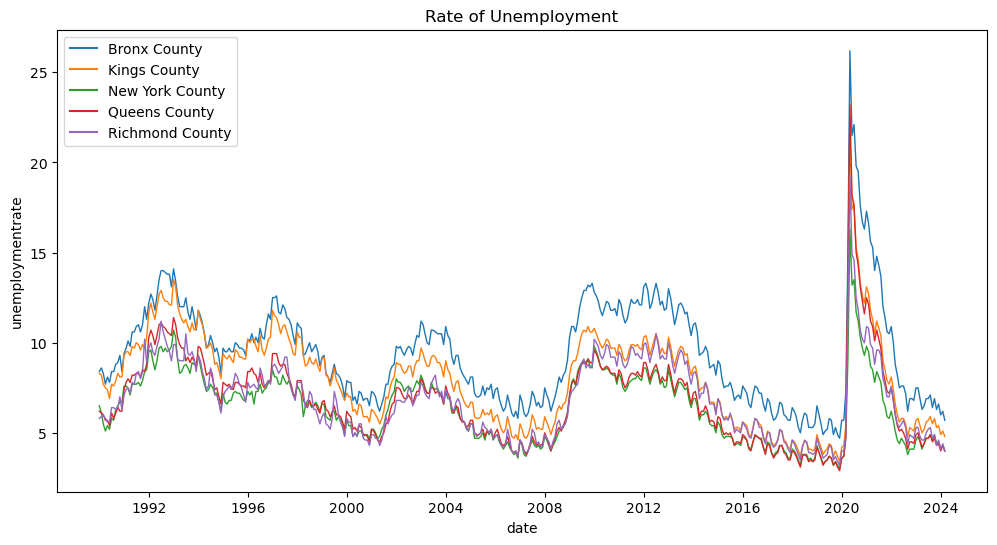

In [82]:
plt.figure(figsize=(12, 6))

# Create the histogram with 'waiting_for_truck_time'
sns.lineplot(x='date',y = 'unemprate', hue='area', data=bo_unem_monthly_d, linewidth=1, color='palevioletred')
# Fill the area under the curve with blue color
#plt.fill_between(harrisburg_full['Date '], harrisburg_full['pct_cancelled'], color='palevioletred', alpha=0.3)
# Set labels and title
##plt.xlabel('pct_cancelled')
plt.ylabel('unemploymentrate')
plt.title('Rate of Unemployment')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Data for whole NYC

In [85]:
area = pd.read_excel('./Data/Unemployment_NYC.xlsx',sheet_name=1)
area.head()

,AREATYPE,AREA,YEAR,MONTH,LABORFORCE,EMP,UNEMP,UNEMPRATE
0,Labor Market Area,Capital Region,2024,1,549700,528200,21500,3.9
1,Labor Market Area,Capital Region,2024,2,550700,528400,22300,4.1
2,Labor Market Area,Capital Region,2024,3,548100,527200,21000,3.8
3,Labor Market Area,Capital Region,2023,0,554900,536800,18100,3.3
4,Labor Market Area,Capital Region,2023,1,545000,525600,19400,3.6


In [86]:
# converting headers to lowercase and removing whitespaces:
area.columns = area.columns.str.lower()
area.columns = area.columns.str.strip()
area.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
0,Labor Market Area,Capital Region,2024,1,549700,528200,21500,3.9
1,Labor Market Area,Capital Region,2024,2,550700,528400,22300,4.1
2,Labor Market Area,Capital Region,2024,3,548100,527200,21000,3.8
3,Labor Market Area,Capital Region,2023,0,554900,536800,18100,3.3
4,Labor Market Area,Capital Region,2023,1,545000,525600,19400,3.6


In [87]:
area['area'].unique()

array(['Capital Region', 'Central New York', 'Finger Lakes',
       'Hudson Valley', 'Long Island', 'Mohawk Valley', 'New York City',
       'North Country', 'Southern Tier', 'Western New York'], dtype=object)

In [89]:
nyc = area.loc[area['area'].isin(['New York City'])]
nyc.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
2670,Labor Market Area,New York City,2024,1,4135100,3945600,189500,4.6
2671,Labor Market Area,New York City,2024,2,4191400,3989000,202500,4.8
2672,Labor Market Area,New York City,2024,3,4208200,4019400,188800,4.5
2673,Labor Market Area,New York City,2023,0,4151900,3935400,216500,5.2
2674,Labor Market Area,New York City,2023,1,4127200,3901700,225500,5.5


In [90]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, 2670 to 3296
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areatype    627 non-null    object 
 1   area        627 non-null    object 
 2   year        627 non-null    int64  
 3   month       627 non-null    int64  
 4   laborforce  627 non-null    int64  
 5   emp         627 non-null    int64  
 6   unemp       627 non-null    int64  
 7   unemprate   627 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 44.1+ KB


### Creating DF with monthly and yearly

In [91]:
nyc_yearly = nyc.loc[nyc['month'] == 0]
nyc_yearly.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
2673,Labor Market Area,New York City,2023,0,4151900,3935400,216500,5.2
2686,Labor Market Area,New York City,2022,0,4096500,3861700,234700,5.7
2699,Labor Market Area,New York City,2021,0,4090300,3676400,413900,10.1
2712,Labor Market Area,New York City,2020,0,4075600,3576800,498900,12.2
2725,Labor Market Area,New York City,2019,0,4261000,4092300,168700,4.0


In [92]:
nyc_monthly = nyc.loc[nyc['month'] != 0]
nyc_monthly.head()

,areatype,area,year,month,laborforce,emp,unemp,unemprate
2670,Labor Market Area,New York City,2024,1,4135100,3945600,189500,4.6
2671,Labor Market Area,New York City,2024,2,4191400,3989000,202500,4.8
2672,Labor Market Area,New York City,2024,3,4208200,4019400,188800,4.5
2674,Labor Market Area,New York City,2023,1,4127200,3901700,225500,5.5
2675,Labor Market Area,New York City,2023,2,4171900,3939400,232600,5.6


In [94]:
# Resetting Index monthly:
nyc_monthly.reset_index(inplace=True)
nyc_monthly.drop('index', axis=1, inplace=True)
nyc_monthly.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/4107334685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_monthly.drop('index', axis=1, inplace=True)


,areatype,area,year,month,laborforce,emp,unemp,unemprate,day,date
0,Labor Market Area,New York City,2024,1,4135100,3945600,189500,4.6,1,2024-01-01
1,Labor Market Area,New York City,2024,2,4191400,3989000,202500,4.8,1,2024-02-01
2,Labor Market Area,New York City,2024,3,4208200,4019400,188800,4.5,1,2024-03-01
3,Labor Market Area,New York City,2023,1,4127200,3901700,225500,5.5,1,2023-01-01
4,Labor Market Area,New York City,2023,2,4171900,3939400,232600,5.6,1,2023-02-01


In [95]:
#Including new column (day) to convert to datetime
nyc_monthly_d = nyc_monthly
nyc_monthly_d['day'] = 1

#Inserting Date
nyc_monthly_d['date'] = pd.to_datetime(nyc_monthly_d[['year', 'month', 'day']], format="%y/%m")

nyc_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/65129014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_monthly_d['day'] = 1
/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/65129014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_monthly_d['date'] = pd.to_datetime(nyc_monthly_d[['year', 'month', 'day']], format="%y/%m")


,areatype,area,year,month,laborforce,emp,unemp,unemprate,day,date
0,Labor Market Area,New York City,2024,1,4135100,3945600,189500,4.6,1,2024-01-01
1,Labor Market Area,New York City,2024,2,4191400,3989000,202500,4.8,1,2024-02-01
2,Labor Market Area,New York City,2024,3,4208200,4019400,188800,4.5,1,2024-03-01
3,Labor Market Area,New York City,2023,1,4127200,3901700,225500,5.5,1,2023-01-01
4,Labor Market Area,New York City,2023,2,4171900,3939400,232600,5.6,1,2023-02-01


In [96]:
# dropping columns we don't need
nyc_monthly_d.drop(['areatype', 'day'], axis= 1, inplace = True)
nyc_monthly_d.head()

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1637/732044436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_monthly_d.drop(['areatype', 'day'], axis= 1, inplace = True)


,area,year,month,laborforce,emp,unemp,unemprate,date
0,New York City,2024,1,4135100,3945600,189500,4.6,2024-01-01
1,New York City,2024,2,4191400,3989000,202500,4.8,2024-02-01
2,New York City,2024,3,4208200,4019400,188800,4.5,2024-03-01
3,New York City,2023,1,4127200,3901700,225500,5.5,2023-01-01
4,New York City,2023,2,4171900,3939400,232600,5.6,2023-02-01


In [97]:
nyc_monthly_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        579 non-null    object        
 1   year        579 non-null    int64         
 2   month       579 non-null    int64         
 3   laborforce  579 non-null    int64         
 4   emp         579 non-null    int64         
 5   unemp       579 non-null    int64         
 6   unemprate   579 non-null    float64       
 7   date        579 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 36.3+ KB


## Concatenate NYC and Borough Data

In [99]:
nyc_monthly_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        579 non-null    object        
 1   year        579 non-null    int64         
 2   month       579 non-null    int64         
 3   laborforce  579 non-null    int64         
 4   emp         579 non-null    int64         
 5   unemp       579 non-null    int64         
 6   unemprate   579 non-null    float64       
 7   date        579 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 36.3+ KB


In [100]:
bo_unem_monthly_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        2055 non-null   object        
 1   year        2055 non-null   int64         
 2   month       2055 non-null   int64         
 3   laborforce  2055 non-null   int64         
 4   emp         2055 non-null   int64         
 5   unemp       2055 non-null   int64         
 6   unemprate   2055 non-null   float64       
 7   date        2055 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 128.6+ KB


In [101]:
nyc_unemployment = pd.concat([bo_unem_monthly_d, nyc_monthly_d])
nyc_unemployment.head()

,area,year,month,laborforce,emp,unemp,unemprate,date
0,Bronx County,2024,1,603800,567500,36300,6.0,2024-01-01
1,Bronx County,2024,2,611800,573800,38000,6.2,2024-02-01
2,Bronx County,2024,3,613000,577900,35100,5.7,2024-03-01
3,Bronx County,2023,1,607200,561500,45700,7.5,2023-01-01
4,Bronx County,2023,2,612800,566900,45900,7.5,2023-02-01


In [102]:
nyc_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2634 entries, 0 to 578
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   area        2634 non-null   object        
 1   year        2634 non-null   int64         
 2   month       2634 non-null   int64         
 3   laborforce  2634 non-null   int64         
 4   emp         2634 non-null   int64         
 5   unemp       2634 non-null   int64         
 6   unemprate   2634 non-null   float64       
 7   date        2634 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 185.2+ KB


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


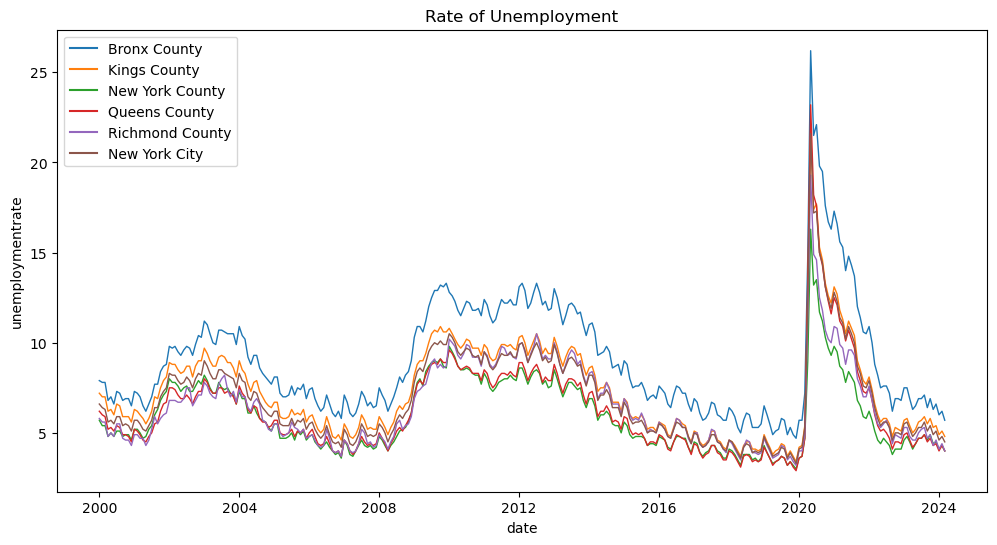

In [116]:
#filtering for starting at 2000
nyc_unemployment_filtered = nyc_unemployment[nyc_unemployment['date'].dt.year >= 2000]

plt.figure(figsize=(12, 6))

# Create the histogram with 'waiting_for_truck_time'
sns.lineplot(x='date',y = 'unemprate', hue='area', data=nyc_unemployment_filtered, linewidth=1, color='palevioletred')
# Fill the area under the curve with blue color
#plt.fill_between(harrisburg_full['Date '], harrisburg_full['pct_cancelled'], color='palevioletred', alpha=0.3)
# Set labels and title
##plt.xlabel('pct_cancelled')
plt.ylabel('unemploymentrate')
plt.title('Rate of Unemployment')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Uploading Data to Postgres

In [117]:
from sql_functions import get_engine

In [118]:
table_name = 'unemployment_nyc'
schema = 'capstone_crime_nerds' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        nyc_unemployment.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The unemployment_nyc table was imported successfully.


In [119]:
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == nyc_unemployment.shape[0]

True